In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from textblob import TextBlob
from nltk import tokenize
import pandas as pd

In [3]:
df = pd.read_csv('trans2.csv')
df.head()

,Original Text,Language,Translated Text
0,Hello,en,Hello
1,Habari ya asubuhi,sw,Good morning
2,Ninunulie kitunguu,sw,Buy me onion
3,Waithira uko uku?,ig,Waithira uko uku?
4,🙏🙏🙏,und,🙏🙏🙏


In [12]:

df['Translated Text'] = df['Translated Text'].astype('str')

def get_polarity(text):
    return TextBlob(text).sentiment.polarity
df['Polarity'] = df['Original Text'].apply(get_polarity)

In [13]:
df.head(100)

,Original Text,Language,Translated Text,Polarity,Sentiment_Type
0,Hello,en,Hello,0.000000,NEUTRAL
1,Habari ya asubuhi,sw,Good morning,0.000000,POSITIVE
2,Ninunulie kitunguu,sw,Buy me onion,0.000000,NEUTRAL
3,Waithira uko uku?,ig,Waithira uko uku?,0.000000,NEUTRAL
4,🙏🙏🙏,und,🙏🙏🙏,0.000000,NEUTRAL
...,...,...,...,...,...
95,"Good morning everyone, hope you all doing grea...",en,"Good morning everyone, hope you all doing grea...",0.409091,POSITIVE
96,Good morning to you. Noted,en,Good morning to you. Noted,0.700000,POSITIVE
97,I normally try to keep a records on my expense...,en,I normally try to keep a records on my expense...,0.145833,POSITIVE
98,What ido is to keep my profit separately and t...,en,What ido is to keep my profit separately and t...,0.433333,POSITIVE


In [14]:
df['Sentiment_Type']=''
df.loc[df.Polarity>0,'Sentiment_Type']='POSITIVE'
df.loc[df.Polarity==0,'Sentiment_Type']='NEUTRAL'
df.loc[df.Polarity<0,'Sentiment_Type']='NEGATIVE'

<AxesSubplot:title={'center':'Sentiment Analysis'}>

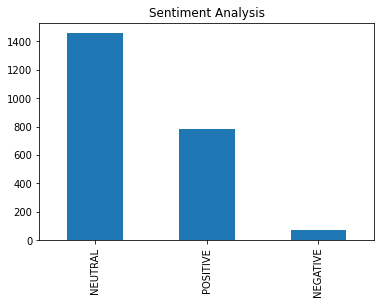

In [15]:
df.Sentiment_Type.value_counts().plot(kind='bar',title="Sentiment Analysis")